In [1]:
import pandas as pd
import numpy as np
ds=pd.read_csv('bill_authentication.csv')
ds

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
x=ds.drop('Class',axis=1)
y=ds['Class']

In [5]:
# Split data set to training and Test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) # 80% for training and 20% for testing
print(x_train)
print(y_train)

      Variance  Skewness  Curtosis  Entropy
239    2.39520    9.5083  -3.17830 -3.00860
563    4.11950   10.9258  -3.89290 -4.18020
714    2.55590    3.3605   2.03210  0.26809
365    3.89990    1.7340   1.60110  0.96765
778   -0.77461   -1.8768   2.40230  1.13190
...        ...       ...       ...      ...
62     4.25860   11.2962  -4.09430 -4.34570
864    0.59823    3.5012  -3.97950 -1.78410
217    1.32640    1.0326   5.65660 -0.41337
1170  -0.34890    3.1929  -3.40540 -3.18320
860   -3.46050    2.6901   0.16165 -1.02240

[1097 rows x 4 columns]
239     0
563     0
714     0
365     0
778     1
       ..
62      0
864     1
217     0
1170    1
860     1
Name: Class, Length: 1097, dtype: int64


In [6]:
from sklearn.tree import DecisionTreeClassifier
clss=DecisionTreeClassifier()
clss.fit(x_train,y_train)
y_pred=clss.predict(x_test)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[143  10]
 [  7 115]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       153
           1       0.92      0.94      0.93       122

    accuracy                           0.94       275
   macro avg       0.94      0.94      0.94       275
weighted avg       0.94      0.94      0.94       275



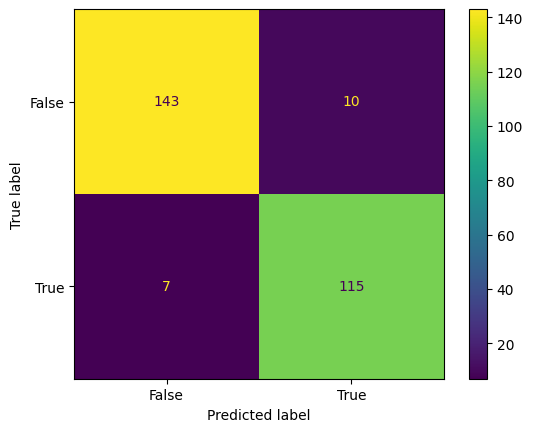

In [8]:
import matplotlib.pyplot as plt
from sklearn import metrics
con_mat=metrics.confusion_matrix(y_test,y_pred)
cm_dis=metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat,display_labels=[False,True])
cm_dis.plot()
plt.show()